In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\nagar\Downloads\train.csv")
print("Shape of dataset")
print("Shape of dataset:", df.shape)
print("Data types & missing values")
print(df.info())
print("Summary statistics for numerical columns")
print(df.describe().T)

Shape of dataset
Shape of dataset: (148670, 34)
Data types & missing values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_r

In [29]:
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isnull().sum())
print("\n--- Duplicates:", df.duplicated().sum())



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront

 No target column found. Please update target_col manually!


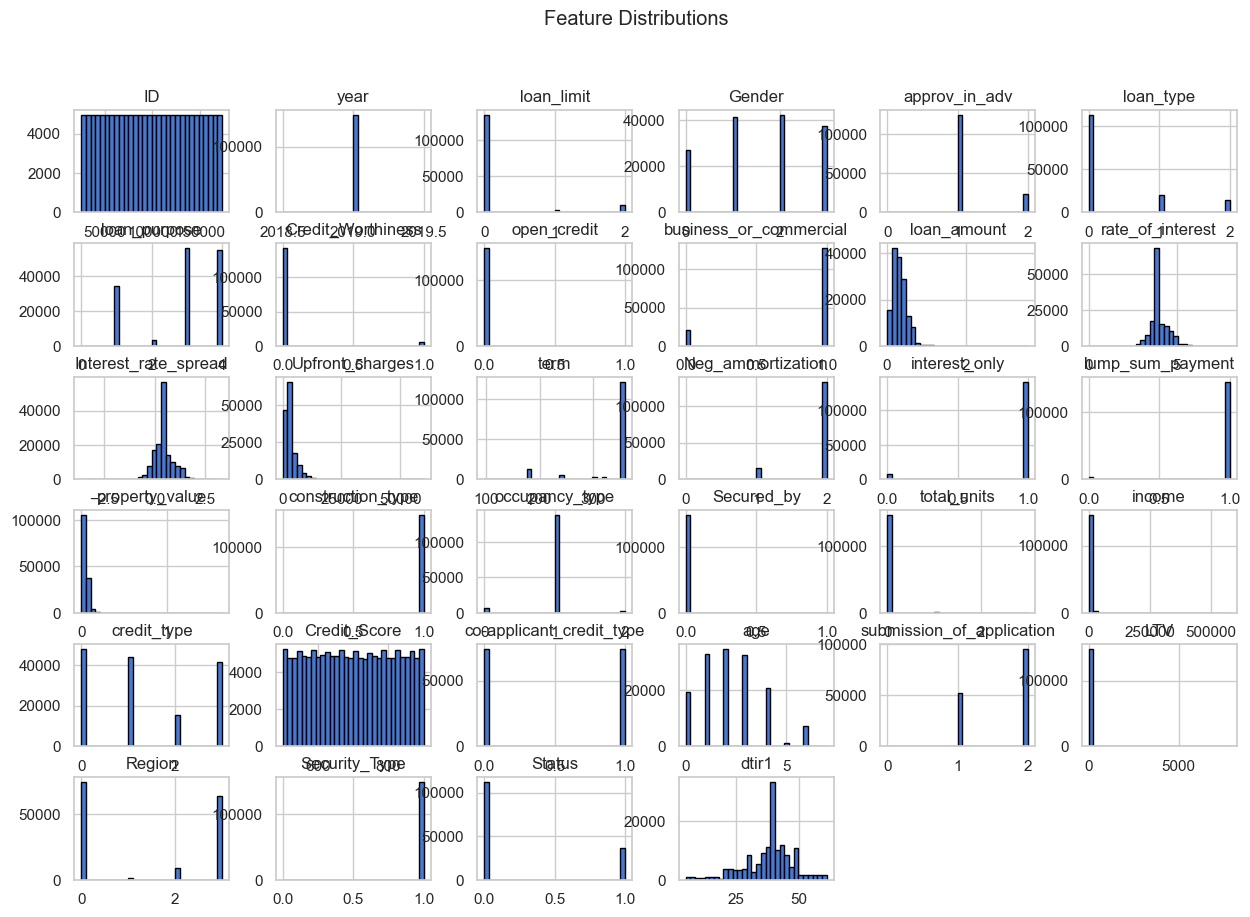

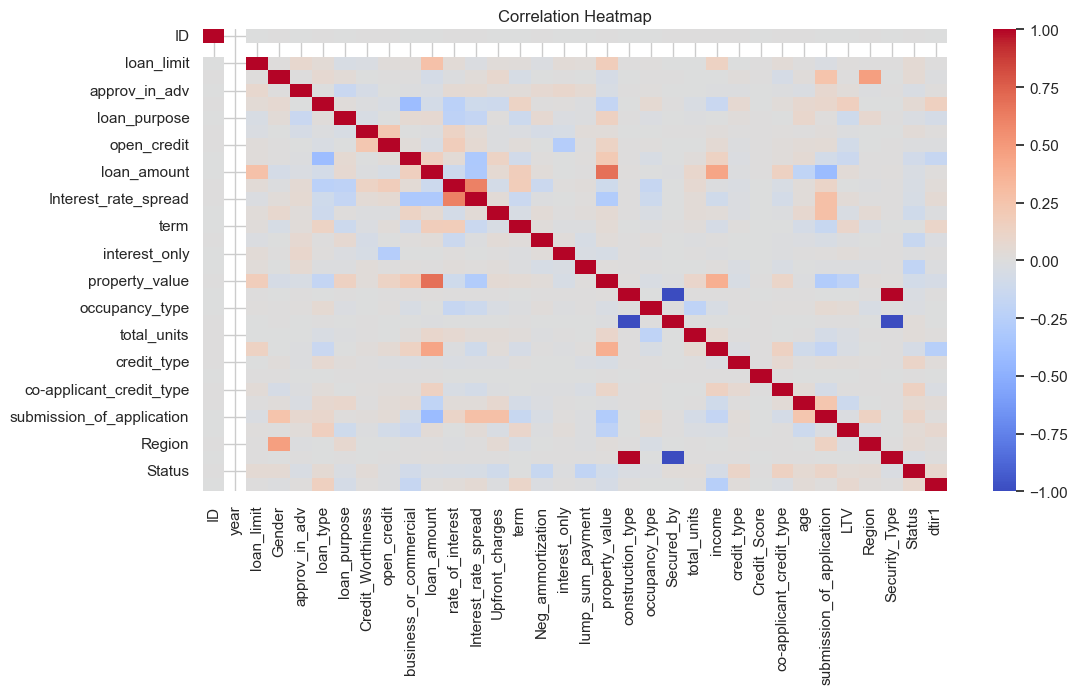

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Check possible target column names
possible_targets = ["target", "default", "loan_default", "Loan_Status", "is_default"]

target_col = None
for col in possible_targets:
    if col in df.columns:
        target_col = col
        break

if target_col:
    # Plot target distribution
    sns.countplot(x=target_col, data=df, palette="Set2")
    plt.title(f"Distribution of {target_col}")
    plt.show()
else:
    print(" No target column found. Please update target_col manually!")
    
# Plot histograms
df.hist(figsize=(15, 10), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()

# Correlation Heatmap (only numeric features)
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

df.fillna(df.median(numeric_only=True), inplace=True)

if target_col:
    X = df.drop(columns=[target_col])
    y = df[target_col]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )


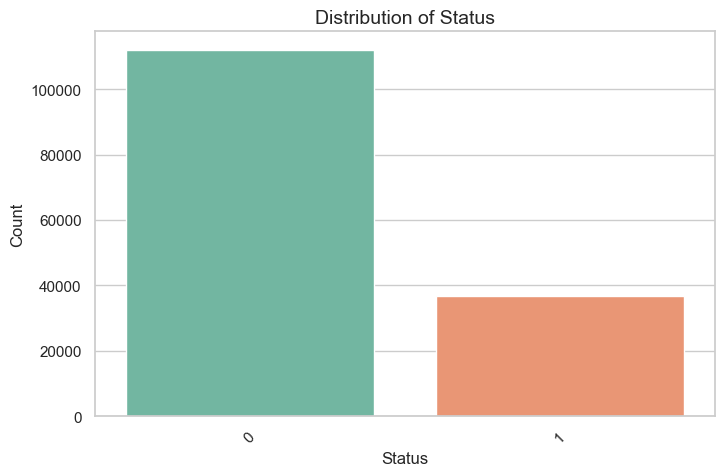

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

target_col = "Status"   

plt.figure(figsize=(8, 5))

sns.countplot(
    x=target_col, 
    data=df, 
    hue=target_col,    
    palette="Set2", 
    legend=False        
)

plt.title(f"Distribution of {target_col}", fontsize=14)
plt.xlabel(target_col, fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()
